# LAB: Python + SQL Integration

## GOAL: Create a bar chart of how much time people spent charging their electric vehicles by day of the week.

Your chart should look something like this:

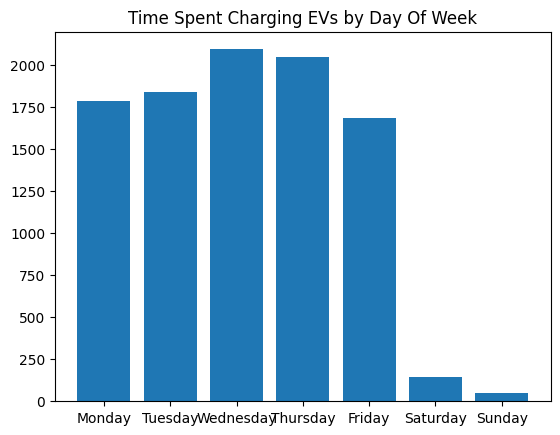

## STEP 1: Compose your aggregate SQL query in DB Browser (7.2).

In [ ]:
# Run this cell to query WITHOUT sorting (must sort using pd.Categorical)
group_query = """
SELECT weekday, SUM(chargeTimeMins) as totalCharge
FROM EVCharging
GROUP BY weekday
"""

In [ ]:
# Run this cell to query WITH sorting (pd.Categorical is not necessary)
group_query = """
SELECT weekday, SUM(chargeTimeMins) as totalCharge
FROM EVCharging
GROUP BY weekday
ORDER BY CASE weekday
    WHEN 'Mon' THEN 1
    WHEN 'Tue' THEN 2
    WHEN 'Wed' THEN 3
    WHEN 'Thu' THEN 4
    WHEN 'Fri' THEN 5
    WHEN 'Sat' THEN 6
    WHEN 'Sun' THEN 7
END
"""

## STEP 2: Use Pandas to get your data from SQL into Python (5.3).

In [ ]:
import pandas as pd
import sqlite3

# XXX NOTE: Make sure you update this path, or you'll get an OperationalError!
connection = sqlite3.connect(R"D:\Savvycoders\dap-curriculum\Section07\Resources\SavvyCoders_SQL_EVtables.db")

df = pd.read_sql_query(group_query, connection)

df

## STEP 3: Create the bar chart using Matplotlib (6.3).
***Hint***: You can use a `CASE` statement to customize the sorting in your `ORDER BY` clause: [How to use CASE in ORDER BY](https://learnsql.com/blog/case-in-sql-order-by/)

In [ ]:
# Run this cell if you used the group query WITHOUT sorting.
cats = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df.weekday = pd.Categorical(df.weekday, categories=cats, ordered=True)
df = df.sort_values(by="weekday")
df

In [ ]:
from matplotlib import pyplot
bars = pyplot.bar(
    df.weekday,
    df.totalCharge
)
pyplot.title("Weekday Grouped Total Charge Time")
pyplot.savefig("lab_ev_charge.png", dpi=100)

# Bonus 1: Write a query to calculate the total charging time for each user.

*Hint*: Group by the User ID!

In [ ]:
SELECT userId, SUM(chargeTimeHrs) AS totalChargeHrs FROM EVCharging
GROUP BY userId
ORDER BY totalChargeHrs DESC

# Bonus 2: Write a query that returns the total number of charging sessions for each facility type, and the average time spent charging.

*Hint*: Group by the facility type!

In [ ]:
SELECT
    facilityType,
    COUNT(*) as amountOfSessions,
    ROUND(AVG(chargeTimeHrs), 2) as avgChargeTime
FROM EVCharging
GROUP BY facilityType